<br><br>

<p style="color:red; font-size:1.3em;">종종 Jupyter notebook에서 <b>Kernel Dead</b> 메시지가 뜨면서 강제로 kernel이 종료될 수 있습니다.</p><br>
<p style="font-size:1.3em;">이 현상은 이미지 파일 등을 처리할 때 컴퓨터의 메모리 부족 등의 이유로 발생할 수 있으며,<br><br>
만일 Kernel Dead 메시지가 뜨면 <span style="color:red;"> <b>다시 첫번째 Cell부터 실행하며 내려가다가 해당 Cell을 제외하고 실행</b>시켜주세요!</span></p>
    
<br><br>

<hr>
<br>

#### **Vision** - **torchvision**.datasets @ https://pytorch.org/vision/stable/datasets.html <br><br> :	CIFAR10 / FashionMNIST / Food101 / ImageNet / MS Coco Detection / etc.
<br>

<hr>
<br>

#### **Text** - **torchtext**.datasets @ https://pytorch.org/text/stable/datasets.html <br><br> :	IMDB / Amazon Reviews / Yelp Reviews / SQuAD / etc.
<br>

<hr>
<br>

#### **Audio** - **torchaudio**.datasets @ https://pytorch.org/audio/stable/datasets.html 
<br>

<hr>
<br>

#### **Recommendation-system** - **torchrec**.datasets @ https://pytorch.org/torchrec/torchrec.datasets.html
<br>

<hr>
<br>

#### **Data Pipelines** - **TorchData**(Beta) @ https://pytorch.org/data/beta/index.html
<br>

<hr>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import torch
from torch import nn

from torch.utils.data import DataLoader # class for loading the dataset (Dataset -> Batches)
from torchmetrics import Accuracy

import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder # Load "Image" data from selected "Folder"s

print(torch.__version__)
print(torchvision.__version__)

2.4.0
0.19.0


<br>
<br>

# 1. Prepare the dataset
<br>

### * Original Dataset : **Food-101** @ https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

<br>

- **101** food categories<br>
- **101,000** images<br>
- **750** training images & **250** test images per class<br>
- rescaled to have a **maximum side length of 512 pixels**

In [3]:
import zipfile
import os
import glob
import random

In [5]:
with zipfile.ZipFile("data_food101/Food101.zip", "r") as zip_f:
    
    print("Unzipping the dataset.") 
    
    zip_f.extractall("data_food101/data") # "extract" "all" files 

Unzipping the dataset.


In [7]:
for data in os.walk("data_food101/data"): # 지정된 디렉토리 내부를 거닐며("walk") 조회
    print(data, '\n') 
    
    # dir_path, dir_names, file_names

('data_food101/data', ['test', 'train'], []) 

('data_food101/data/test', ['steak', 'sushi', 'pizza'], []) 

('data_food101/data/test/steak', [], ['296375.jpg', '673127.jpg', '894825.jpg', '1868005.jpg', '27415.jpg', '1016217.jpg', '1285886.jpg', '502076.jpg', '3424937.jpg', '690177.jpg', '354513.jpg', '2117351.jpg', '100274.jpg', '2144308.jpg', '966174.jpg', '1882831.jpg', '3873283.jpg', '1302563.jpg', '1627703.jpg']) 

('data_food101/data/test/sushi', [], ['858157.jpg', '988559.jpg', '479711.jpg', '1987407.jpg', '1230335.jpg', '1245193.jpg', '2741434.jpg', '1434806.jpg', '3837522.jpg', '207578.jpg', '3177743.jpg', '2385731.jpg', '1680893.jpg', '175783.jpg', '1172255.jpg', '887831.jpg', '2715127.jpg', '2190404.jpg', '684266.jpg', '3806282.jpg', '2540511.jpg', '1742201.jpg', '46797.jpg', '499605.jpg', '1600999.jpg', '2276986.jpg', '719108.jpg', '343036.jpg', '3196729.jpg', '2394442.jpg', '2521706.jpg']) 

('data_food101/data/test/pizza', [], ['195160.jpg', '1687143.jpg', '971934.jpg', 

In [9]:
for dir_path, dir_names, file_names in os.walk("data_food101/data"): # 지정된 디렉토리 내부를 거닐며("walk") 조회
    
    if len(dir_names) == 3:
        print('--------------------------------')
    
    print("There are {} directories and {} images in '{}'.".format(len(dir_names), len(file_names), dir_path))

There are 2 directories and 0 images in 'data_food101/data'.
--------------------------------
There are 3 directories and 0 images in 'data_food101/data/test'.
There are 0 directories and 19 images in 'data_food101/data/test/steak'.
There are 0 directories and 31 images in 'data_food101/data/test/sushi'.
There are 0 directories and 25 images in 'data_food101/data/test/pizza'.
--------------------------------
There are 3 directories and 0 images in 'data_food101/data/train'.
There are 0 directories and 75 images in 'data_food101/data/train/steak'.
There are 0 directories and 72 images in 'data_food101/data/train/sushi'.
There are 0 directories and 78 images in 'data_food101/data/train/pizza'.


In [11]:
TRAIN_DIR = "data_food101/data/train"
TEST_DIR  = "data_food101/data/test"

In [13]:
glob.glob("data_food101/data/train/*")

['data_food101/data/train/steak',
 'data_food101/data/train/sushi',
 'data_food101/data/train/pizza']

In [15]:
glob.glob("data_food101/data/train/*/*.jpg")

['data_food101/data/train/steak/239025.jpg',
 'data_food101/data/train/steak/1598345.jpg',
 'data_food101/data/train/steak/3074367.jpg',
 'data_food101/data/train/steak/2979061.jpg',
 'data_food101/data/train/steak/914570.jpg',
 'data_food101/data/train/steak/167069.jpg',
 'data_food101/data/train/steak/231296.jpg',
 'data_food101/data/train/steak/2324994.jpg',
 'data_food101/data/train/steak/2603058.jpg',
 'data_food101/data/train/steak/1961025.jpg',
 'data_food101/data/train/steak/1615395.jpg',
 'data_food101/data/train/steak/2606444.jpg',
 'data_food101/data/train/steak/355715.jpg',
 'data_food101/data/train/steak/2163079.jpg',
 'data_food101/data/train/steak/1736968.jpg',
 'data_food101/data/train/steak/2878151.jpg',
 'data_food101/data/train/steak/1976160.jpg',
 'data_food101/data/train/steak/1382427.jpg',
 'data_food101/data/train/steak/830007.jpg',
 'data_food101/data/train/steak/256592.jpg',
 'data_food101/data/train/steak/2561199.jpg',
 'data_food101/data/train/steak/3142674.j

In [17]:
train_images = glob.glob("data_food101/data/train/*/*.jpg")

sample_image = random.choice(train_images)

sample_image

'data_food101/data/train/sushi/3004029.jpg'

512
512


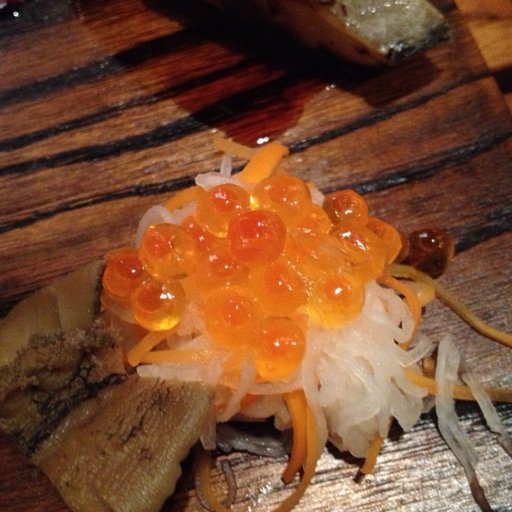

In [19]:
from PIL import Image

img = Image.open(sample_image)

print(img.height)
print(img.width)

img

(512, 512, 3)


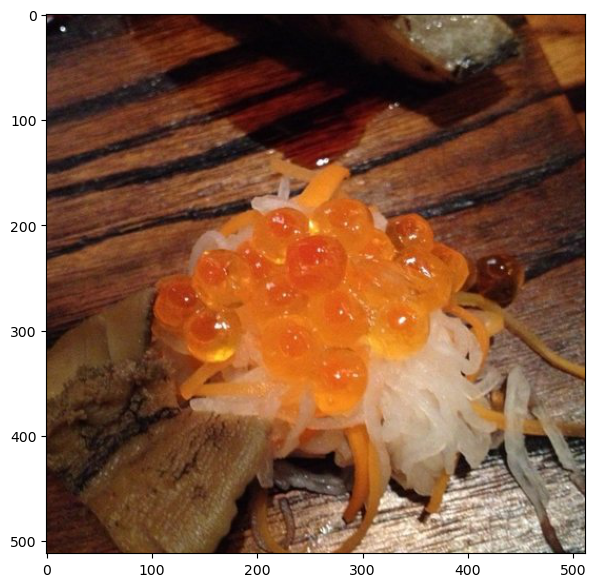

In [21]:
img = Image.open(sample_image)

# Should change an image file into a "numpy array" first to use "plt.imshow()"
img_array = np.array(img)

print(img_array.shape)

plt.figure(figsize=(10, 7))

plt.imshow(img_array)

<br>
<br>

# 2. Prepare the **DataLoader** - Using [ torchvision.datasets.**ImageFolder** ]

### 1) prepare the image-transformation (**Resize** & **ToTensor**)

In [23]:
from torchvision import transforms

In [25]:
# torchvision.transforms.ToTensor()는 pixel 값들을 [ 0~255 ] 에서 [ 0.0~1.0 ]으로 자동 변환합니다. @ https://bit.ly/3gpqIn0

IMG_TRANSFORM = transforms.Compose([ # "구성하다"(compose)
    
    transforms.Resize(size=(64, 64)), # image resize
    transforms.ToTensor() # (Original) PIL format -> PyTorch tensors 

])

### 2) **image directories** -> **ImageFolder** (with image-transformation)

In [27]:
from torchvision.datasets import ImageFolder

In [31]:
train_imgfolder = ImageFolder(root=TRAIN_DIR,
                              transform=IMG_TRANSFORM, # torchvision.transforms.Compose
                              target_transform=None)   # we can transform labels, too (if it is needed)

test_imgfolder  = ImageFolder(root=TEST_DIR,
                              transform=IMG_TRANSFORM)

print(train_imgfolder, '\n')
print(test_imgfolder)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data_food101/data/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           ) 

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data_food101/data/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [33]:
train_imgfolder.classes # automatically extracted from the names of directories

['pizza', 'steak', 'sushi']

In [35]:
len(train_imgfolder)

225

In [37]:
train_imgfolder[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [39]:
train_imgfolder.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [41]:
img   = train_imgfolder[0][0]
label = train_imgfolder[0][1]

<class 'torch.Tensor'>
torch.Size([3, 64, 64])
torch.float32
0


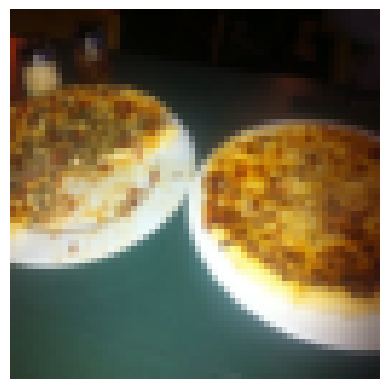

In [43]:
print(type(img))
print(img.shape) # after the data-augmentation
print(img.dtype)
print(label)

plt.imshow(img.permute(1, 2, 0)) # tensor.permute(1, 2, 0) : [ Channels, Height, Width ] -> [ Height, Width, Channels ]
plt.axis("off")
plt.show()

### 3) (**image directories** ->) **ImageFolder** -> **DataLoader** (iterable for mini-batches)

In [45]:
from torch.utils.data import DataLoader

In [47]:
os.cpu_count() # the total number of CPUs on the current machine

10

In [49]:
torch.manual_seed(42)

train_dataloader = DataLoader(dataset=train_imgfolder, 
                              batch_size=32, 
                              num_workers=os.cpu_count(), # number of subprocesses to use for data loading
                              shuffle=True)

test_dataloader  = DataLoader(dataset=test_imgfolder, 
                              batch_size=32, 
                              num_workers=os.cpu_count(), 
                              shuffle=False) # 테스트 데이터는 shuffling할 필요가 없습니다.

In [51]:
# A set of batch-data

batch_x, batch_y = next(iter(train_dataloader))

In [52]:
batch_x.shape

torch.Size([32, 3, 64, 64])

In [53]:
batch_y.shape

torch.Size([32])

<class 'torch.Tensor'>
torch.Size([3, 64, 64])
torch.float32


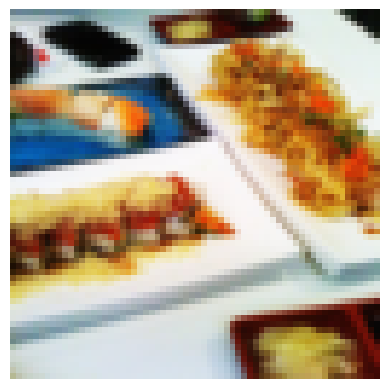

In [57]:
image_sample = batch_x[0]

print(type(image_sample))
print(image_sample.shape) # after the data-augmentation
print(image_sample.dtype)

plt.imshow(image_sample.permute(1, 2, 0))
plt.axis("off")
plt.show()

<br>
<br>

# 3. Build the model - CNN **without** data-augmentation


In [59]:
class CNN_TinyVGG(nn.Module): # should inherit the class nn.Module
    
    
    def __init__(self, num_channels, num_filters, num_classes): 
        
        super().__init__()
        
        #이미지 데이터가 들어오는 입구
        self.conv_block_entrance = nn.Sequential( # Create a sequential model
            
            # Convolution-layer
            nn.Conv2d(in_channels=num_channels, # will be '3' == R/G/B
                      out_channels=num_filters, # num_filters == num of feature-maps == num of output channels
                      kernel_size=(3, 3), 
                      stride=1,     # default
                      padding=1),   # 0 == 'valid', 1 == 'same' 
            nn.ReLU(),
            
            # Convolution-layer
            nn.Conv2d(in_channels=num_filters,  # should be same as the number of "channels of previous output"
                      out_channels=num_filters,
                      kernel_size=(3, 3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            
            # Pooling-layer
            nn.MaxPool2d(kernel_size=2, stride=2) # "stride" Default == kernel_size (자동으로 지정됨)
        )
        # [ 32, 3, 64, 64 ] -> [ 32, 10, 32, 32 ]
        
        
        self.conv_block_within = nn.Sequential(
            nn.Conv2d(num_filters, num_filters, (3, 3), padding=1),
            nn.ReLU(),
            nn.Conv2d(num_filters, num_filters, (3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # [ 32, 10, 32, 32 ] -> [ 32, 10, 16, 16 ]
        
        
        self.classifier_block = nn.Sequential(
            nn.Flatten(), # Flatten the input data
            nn.Linear(in_features=num_filters * 16 * 16, 
                      out_features=num_classes)
        )
        # [ 32, 10, 16, 16 ] -> [ 32, 10 * 16 * 16 ] -> [ 32, 10 ]
    
    
    def forward(self, x):
        
        x = self.conv_block_entrance(x)
        # print(x.shape)
        
        x = self.conv_block_within(x)
        # print(x.shape)
        
        x = self.classifier_block(x)
        # print(x.shape)
        
        # 아래와 같이 코드를 작성하게되면 메모리가 크게 소요되는 변수 재할당 과정이 생략되므로 계산 속도가 향상됩니다. (https://bit.ly/3V16ZJy)
        # return self.classifier_block(conv_block_within(conv_block_entrance(x)))
        
        return x

<br>
<br>

# 4.  Train the model

In [61]:
device = "cuda" if torch.cuda.is_available() else "cpu" # "cuda"가 사용 가능하다면 (if it "is available")

device

'cpu'

<br>

### 1) Initialize the model

In [63]:
torch.manual_seed(42) # "Manually" set the "seed"

model = CNN_TinyVGG(num_channels=3, # R / G / B
                    num_filters=10, # number of filters == number of feature-maps
                    num_classes=3   # Pizza / Steak / Sushi
                   ).to(device)
    
model

CNN_TinyVGG(
  (conv_block_entrance): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_within): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [65]:
# 모델 내에서의 Shape 변화를 확인하고 싶을 경우 forward 함수 내 주석 해제 후 아래 코드를 실행해주세요.

temp_batch_x = next(iter(train_dataloader))[0]

print(temp_batch_x.shape)

model(temp_batch_x)

torch.Size([32, 3, 64, 64])


tensor([[0.0578, 0.0634, 0.0352],
        [0.0658, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0375],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0348],
        [0.0620, 0.0599, 0.0370],
        [0.0607, 0.0628, 0.0387],
        [0.0637, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0690, 0.0330],
        [0.0557, 0.0570, 0.0357],
        [0.0631, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0369],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0638, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

<br>

### 2) Check the model before training

In [67]:
# batch_x, batch_y = next(iter(train_dataloader))

sample_label = batch_y[0]

sample_img = batch_x[0]
print(sample_img.shape)

sample_img = sample_img.reshape(1, 3, 64, 64)
print(sample_img.shape, '\n')

    
# 모델을 evaluation mode로 설정
model.eval()

with torch.inference_mode(): # Set "inference mode"
    logits = model(sample_img.to(device))

    
print(logits)

print(logits.softmax(dim=1)) # 행 방향 Softmax 적용

print(logits.softmax(dim=1).argmax(dim=1)[0]) # 행 방향 Softmax & argmax 적용

print(sample_label)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64]) 

tensor([[0.0657, 0.0651, 0.0391]])
tensor([[0.3363, 0.3361, 0.3275]])
tensor(0)
tensor(2)


In [69]:
!pip install torchinfo 

# 1.7.1

In [71]:
from torchinfo import summary # 요약

summary(model, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
CNN_TinyVGG                              [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

<br>

### 3) Make train & test step as separate functions

In [73]:
def train_step(model, dataloader, loss_fn, optimizer, metric, device):
    
    # 모델을 training mode로 설정 (default state)
    model.train()
    
    # train-loss & train-accuracy for one epoch
    train_loss = 0
    train_acc  = 0
    
    for batch_idx, (X, y) in enumerate(dataloader): # get an item from DataLoader with it's index number
        
        X = X.to(device)
        y = y.to(device)
        
        # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        logits = model(X)

        # 2. (Batch) Training cost 계산 (Cost function 계산)
        loss = loss_fn(logits, y) # cost of batch <- nn.CrossEntropyLoss() : built-in Softmax
        train_loss += loss.item()
        
        # 3. Optimizer 내부의 이전 gradient 값 초기화 (Make "grad" to "zero")
        optimizer.zero_grad()

        # 4. Back-propagation ("Backward" propagation)
        loss.backward()

        # 5. Gradient descent 진행 (Take a "step" to update parameters)
        optimizer.step()

        # 6. (Batch) Training accuracy 계산 
        predicted_classes = logits.softmax(dim=1).argmax(dim=1)
        train_acc += metric(predicted_classes, y).item() # calculate the batch accuracy & add to the epoch accuracy

    
    # Batch 순회 종료 후
    train_loss = train_loss / len(dataloader) # cost of batches / num of batches (calculate average)
    train_acc  = train_acc  / len(dataloader) # acc  of batches / num of batches (calculate average)
    
    return train_loss, train_acc

In [75]:
def test_step(model, dataloader, loss_fn, metric, device):
    
    # 모델을 evaluation mode로 설정
    model.eval() 
    
    # test-loss & test-accuracy for one epoch
    test_loss = 0
    test_acc  = 0
    
    with torch.inference_mode(): # Set "inference mode"
        
        for batch_idx, (X, y) in enumerate(dataloader): # get an item from DataLoader with it's index number
            
            X = X.to(device)
            y = y.to(device)
    
            # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
            logits = model(X)

            # 2. (Batch) Test cost 계산 (Cost function 계산)
            loss = loss_fn(logits, y) # cost of batch <- nn.CrossEntropyLoss() : built-in Softmax
            test_loss += loss.item()

            # 3. (Batch) Test accuracy 계산 
            predicted_classes = logits.softmax(dim=1).argmax(dim=1)
            test_acc += metric(predicted_classes, y).item() # calculate the batch accuracy & add to the epoch accuracy

    
    # Batch 순회 종료 후
    test_loss = test_loss / len(dataloader) # cost of batches / num of batches (calculate average)
    test_acc  = test_acc  / len(dataloader) # acc  of batches / num of batches (calculate average)
    
    return test_loss, test_acc

<br>

### 4) Combine train & test step into a simplified "train" function 

In [77]:
def train(model, 
          train_dataloader, test_dataloader, 
          optimizer, loss_fn, metric, 
          device, epochs=5):
    
    
    results = {"train_loss": [], 
               "train_acc" : [], 
               "test_loss" : [], 
               "test_acc"  : []}
    
    
    for epoch in tqdm(range(epochs)): # from tqdm.auto import tqdm
        
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn, 
                                           optimizer=optimizer, 
                                           metric=metric, 
                                           device=device)
        
        test_loss, test_acc   = test_step(model=model,
                                          dataloader=test_dataloader, 
                                          loss_fn=loss_fn, 
                                          metric=metric, 
                                          device=device)
        
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
        
        print('Epoch : {} | Train_loss : {} | Train_acc : {} | Test_loss : {} | Test_acc : {}'.format(epoch+1, 
                                                                                                      train_loss, 
                                                                                                      train_acc, 
                                                                                                      test_loss, 
                                                                                                      test_acc))
    
    return results

<br>

### 5) Train the model & Check the result

In [79]:
torch.manual_seed(42) 

model = CNN_TinyVGG(num_channels=3, # R / G / B
                    num_filters=10, # number of filters == number of feature-maps
                    num_classes=3   # Pizza / Steak / Sushi <- len(train_data.classes)
                   ).to(device)

In [83]:
loss_fn = nn.CrossEntropyLoss() # Softmax + CrossEntropy (built-in Softmax)

optimizer = torch.optim.Adam(params=model.parameters(), # "parameters" to optimize (apply gradient descent)
                             lr=0.001)                  # "l"earning "r"ate 
    
metric_accuracy = Accuracy(task="multiclass", num_classes=3).to(device) # from torchmetrics import Accuracy

In [85]:
from timeit import default_timer as timer 

START_TIME = timer()

NUM_EPOCHS = 10

model_results = train(model=model, 
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn, 
                      metric=metric_accuracy,
                      device=device,
                      epochs=NUM_EPOCHS)

END_TIME = timer()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 1 | Train_loss : 1.1078328043222427 | Train_acc : 0.2578125 | Test_loss : 1.1360410054524739 | Test_acc : 0.2604166666666667
Epoch : 2 | Train_loss : 1.084714651107788 | Train_acc : 0.42578125 | Test_loss : 1.1620028018951416 | Test_acc : 0.19791666666666666
Epoch : 3 | Train_loss : 1.1156955659389496 | Train_acc : 0.29296875 | Test_loss : 1.1696916818618774 | Test_acc : 0.19791666666666666
Epoch : 4 | Train_loss : 1.095538005232811 | Train_acc : 0.4140625 | Test_loss : 1.13869043191274 | Test_acc : 0.19791666666666666
Epoch : 5 | Train_loss : 1.0984338372945786 | Train_acc : 0.29296875 | Test_loss : 1.143406828244527 | Test_acc : 0.19791666666666666
Epoch : 6 | Train_loss : 1.0956148505210876 | Train_acc : 0.25 | Test_loss : 1.147458553314209 | Test_acc : 0.2604166666666667
Epoch : 7 | Train_loss : 1.119071438908577 | Train_acc : 0.3046875 | Test_loss : 1.142408013343811 | Test_acc : 0.3020833333333333
Epoch : 8 | Train_loss : 1.1035292595624924 | Train_acc : 0.35546875 | Test

In [163]:
print('Training time : {} seconds'.format(round(END_TIME-START_TIME, 2)))

Training time : 106.05 seconds


In [164]:
model_results

{'train_loss': [1.1078356504440308,
  1.084644876420498,
  1.1152725219726562,
  1.0989955812692642,
  1.098921298980713,
  1.096383586525917,
  1.1183543056249619,
  1.1010172367095947,
  1.0883031785488129,
  1.0668021216988564],
 'train_acc': [0.2578125,
  0.42578125,
  0.29296875,
  0.2890625,
  0.29296875,
  0.30859375,
  0.31640625,
  0.36328125,
  0.48828125,
  0.40234375],
 'test_loss': [1.1362075010935466,
  1.1621671517690022,
  1.1694695154825847,
  1.134177525838216,
  1.1433651447296143,
  1.1485037803649902,
  1.1414344310760498,
  1.1040594975153606,
  1.0661935806274414,
  1.0149725675582886],
 'test_acc': [0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.3333333333333333,
  0.20833333333333334,
  0.5416666666666666,
  0.5416666666666666]}

In [165]:
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [166]:
train_loss = model_results['train_loss']
test_loss  = model_results['test_loss']

train_acc  = model_results['train_acc']
test_acc   = model_results['test_acc']

epochs = range(len(model_results['train_loss']))

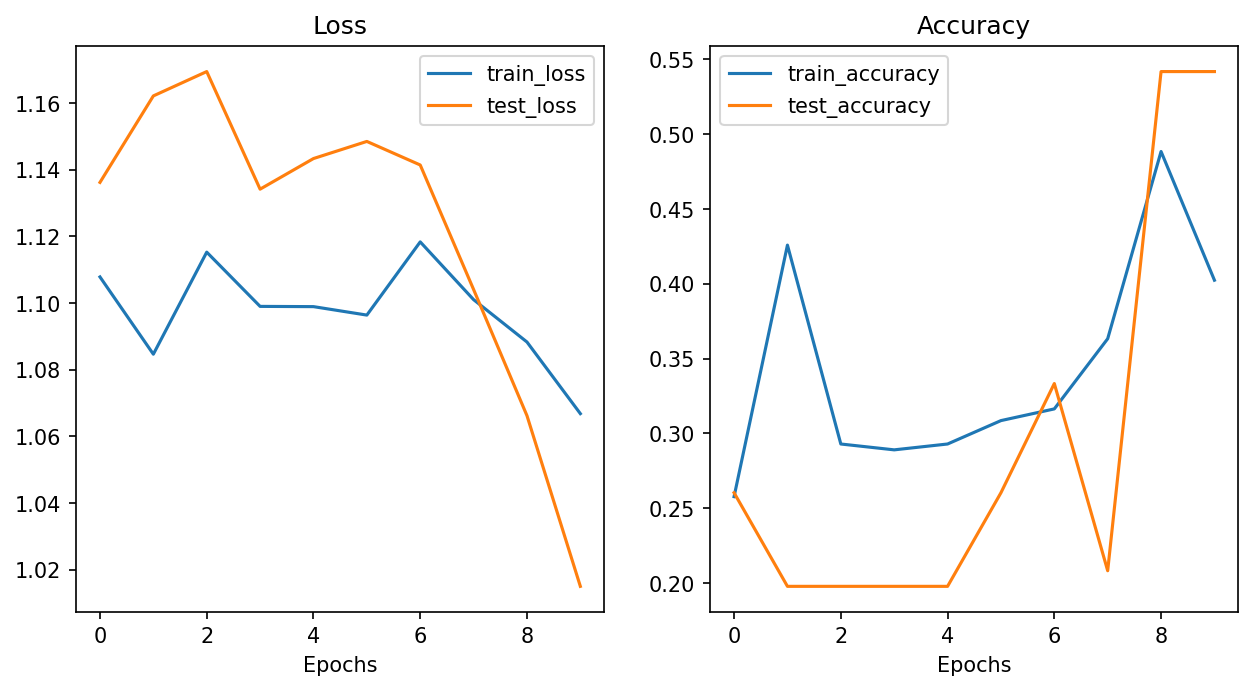

In [167]:
plt.figure(figsize=(10, 5), dpi=150)

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='train_loss')
plt.plot(epochs, test_loss,  label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='train_accuracy')
plt.plot(epochs, test_acc,  label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

<br>

### -> Test data 기준 정확도가 겨우 20%? (**Under-fitting**)

<br>

In [87]:
import pickle

with open('model_result_CNN_1.pkl', 'wb') as f:
    pickle.dump(model_results, f)